In [1]:
import pyvista as pv
from Kirchhoffpy import lenspy
from Kirchhoffpy import Feedpy
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from Kirchhoffpy import coordinate,field_storage
from Kirchhoffpy.Vopy import CO,dotproduct,abs_v
c=299792458
p = pv.Plotter()
srffolder = 'srf/'


In [2]:
# 1. define frequnecy and wavelength
freq = 150*10**9
Lambda = c*1000/freq
k = 2*np.pi/Lambda
print(Lambda,k)


1.9986163866666666 3.1437675329275225


In [34]:
# 2. define coordinate systems
eff_focal_length = 569.56 #mm
coord_ref = coordinate.coord_sys([0,0,0],[0,0,0],axes = 'xyz')

coord_L1 = coordinate.coord_sys([0,0,-(803.9719951339465-4.34990822154231*10)],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)
coord_L2 = coordinate.coord_sys([0,0,-(227.64396727901004-4.696706712699847*10)],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)
coord_L3 = coordinate.coord_sys([0,0,-(71.77590111674095-2.96556*10)],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)

coord_feed_offset = coordinate.coord_sys([50,0,0],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)
coord_feed_rotation = coordinate.coord_sys([0,0,0],[0,0,0],axes = 'xyz',ref_coord = coord_feed_offset)
coord_feed = coordinate.coord_sys([0,0,0],[0,0,0],axes = 'xyz',ref_coord = coord_feed_rotation)



coord_sky_ref = coordinate.coord_sys([0,0,0],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)
coord_sky = coordinate.coord_sys([0,0,0],[0,-50/569.56,0],axes = 'xyz',ref_coord = coord_sky_ref)


In [ ]:
np.sin(50/569.56)


np.float64(0.08767435096774044)

In [4]:
# 3. define input Feedhorn
feed= Feedpy.GaussiBeam(-2.1714724,
                        10.1161095,
                        k,
                        coord_feed,
                        polarization = 'x')


26584903304305.848


In [ ]:
# 4. Lenses and aperture 
outputfolder = 'output2/150GHz/x50_offaxis/'
L1 = lenspy.simple_Lens(3.36,
                        4.34991*10,# Thickness
                        44.8*10, # diameter
                        srffolder + 'lens1_f2.rsf', 
                        srffolder + 'lens1_f1.rsf',
                        p,
                        coord_L1,
                        name = 'L1',
                        outputfolder = outputfolder)
L2 = lenspy.simple_Lens(3.36,
                        4.69671*10,# Thickness
                        44.8*10, # diameter
                        srffolder + 'lens2_f2.rsf', 
                        srffolder + 'lens2_f1.rsf',
                        p,
                        coord_L2,
                        name = 'L2',
                        outputfolder = outputfolder)

L3 = lenspy.simple_Lens(3.36,
                        2.96556*10,# Thickness
                        44.8*10, # diameter
                        srffolder + 'lens3_f2.rsf', 
                        srffolder + 'lens3_f1.rsf',
                        p,
                        coord_L3,
                        name = 'L3',
                        outputfolder = outputfolder)
#L2 = lenspy.simple_Lens(2,46.9671 ,400, srffolder + 'lens2_f1.rsf', srffolder + 'lens2_f2.rsf',p,[0,0,-227.64396727901004],name = 'L2')
#L3 = lenspy.simple_Lens(2,29.6556 ,400, srffolder + 'lens3_f1.rsf', srffolder + 'lens3_f2.rsf',p,[0,0,-71.77590111674095],name = 'L3')


In [35]:
# 5. fiedl storage
center_grd = field_storage.Spherical_grd(coord_sky,
                                         0,
                                         0,
                                         20,
                                         20,
                                         501,501,
                                         Type = 'ELoverAz', 
                                         far_near = 'far',
                                         distance = 50000)


In [7]:
N1 =[760,1880]
N2 = [480,2160]
L3.PO_analysis(#[400,1,400,1],
               [1,N1[0],N1[1],1],
               [1,N2[0],N2[1],1],
               #[5,N2[0],N2[1],1],
            feed,k,
            sampling_type_f1='polar',
            phi_type_f1 = 'less',
            sampling_type_f2='polar',
            phi_type_f2 = 'less',
            po_name = '_po_cur_0mm.h5',
            Method ='POPO')


Gain of the Guassian feedhonr!
-6.633057382438087 dB
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
input power
poynting value max!
0.003295661511335641
13.045181271562043
******
(array([], dtype=int64),)
test vx
1.0000000000000004 0.9999999999999994
cores: 38


100%|██████████| 17419/17419 [1:35:14<00:00,  3.05it/s]


(array([], dtype=int64),)
test vx
1.0000000000000004 0.9999999999999994
Transform f1
poynting value max!
0.0023185879652886502
8.689159743420767
f2
poynting value max!
0.0016991905387918425
8.891653437872835
f2 transmission
poynting value max!
6.398189581749594


In [8]:
N1 =[740,2320]
N2 = [195,390]
L2.PO_analysis(#[400,1,400,1],
               [1,N1[0],N1[1],1],
               [1,N2[0],N2[1],1],
               #[5,N2[0],N2[1],1],
            L3,k,
            sampling_type_f1='polar',
            phi_type_f1 = 'less',
            sampling_type_f2='polar',
            phi_type_f2 = 'less',
            po_name = '_po_cur_0mm.h5',
            Method ='POPO')


output2/150GHz/x50_offaxis/L3_po_cur_0mm.h5
Here
cores: 52


100%|██████████| 21073/21073 [1:52:44<00:00,  3.12it/s]


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
input power
poynting value max!
0.00012272839855562447
6.489205838937046
******
(array([], dtype=int64),)
test vx
1.0000000000000004 0.9999999999999994
cores: 32


100%|██████████| 1536/1536 [08:23<00:00,  3.05it/s]


(array([], dtype=int64),)
test vx
1.0000000000000004 0.9999999999999996
Transform f1
poynting value max!
8.676577546136456e-05
4.398266660271776
f2
poynting value max!
7.037922652647942e-05
4.448657797544045
f2 transmission
poynting value max!
3.1630520093926267


In [9]:
N1 =[680,2320]
N2 = [600,200]
L1.PO_analysis(#[400,1,400,1],
               [1,N1[0],N1[1],1],
               [1,N2[0],N2[1],1],
               #[5,N2[0],N2[1],1],
            L2,k,
            sampling_type_f1='polar',
            phi_type_f1 = 'less',
            sampling_type_f2='polar',
            phi_type_f2 = 'less',
            po_name = '_po_cur_0mm.h5',
            Method ='POPO')


output2/150GHz/x50_offaxis/L2_po_cur_0mm.h5
Here
cores: 713


100%|██████████| 1412/1412 [07:31<00:00,  3.13it/s]


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
input power
poynting value max!
5.335285282947403e-06
2.9391487990646903
******
(array([], dtype=int64),)
test vx
1.0000000000000004 0.9999999999999994
cores: 34


100%|██████████| 2311/2311 [11:59<00:00,  3.21it/s]


(array([], dtype=int64),)
test vx
1.0000000000000004 0.9999999999999994
Transform f1
poynting value max!
3.7507168865221064e-06
2.056257841411127
f2
poynting value max!
3.6228455204648473e-06
2.044315524796084
f2 transmission
poynting value max!
1.4525701121109218


In [10]:
center_grd.grid.x = center_grd.grid.x.ravel()
center_grd.grid.y = center_grd.grid.y.ravel()
center_grd.grid.z = center_grd.grid.z.ravel()
print(center_grd.grid.z.size)


251001


In [36]:
#L1.surf_cur_file = 'output/L1_po_cur_0mm_x.h5'

L1.source(center_grd,
          k,
          far_near = 'far')


output2/150GHz/x50_offaxis/L1_po_cur_0mm.h5
[[ 9.96149190e-01 -5.13321994e-34  8.76743510e-02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-8.76743510e-02 -1.05745386e-32  9.96149190e-01]]
*(**)
cores: 743


100%|██████████| 337/337 [00:31<00:00, 10.86it/s]


In [46]:
r, theta, phi = center_grd.coord_sys._toSpherical(center_grd.grid.x,center_grd.grid.y,center_grd.grid.z)
co,cx,crho = CO(theta,phi)
E_co = dotproduct(center_grd.E,co)
E_cx = dotproduct(center_grd.E,cx)


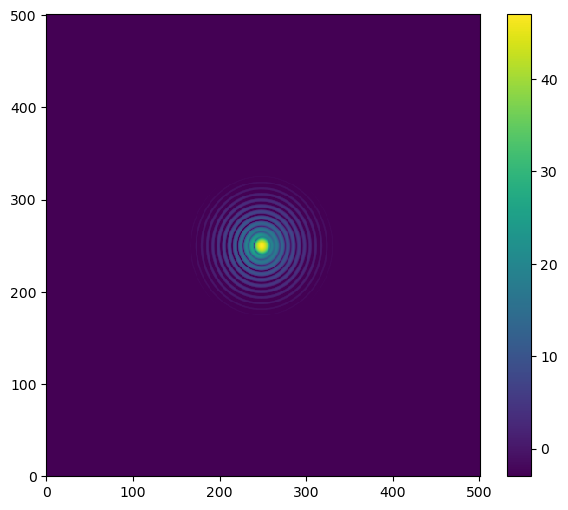

In [47]:
fig = plt.figure(figsize = (7,6))
vmax= np.log10(np.abs(E_co.reshape(501,-1)).max())*20
plt.pcolor(np.log10(np.abs(E_co.reshape(501,-1)))*20,vmax = vmax, vmin = vmax-50)
plt.colorbar()


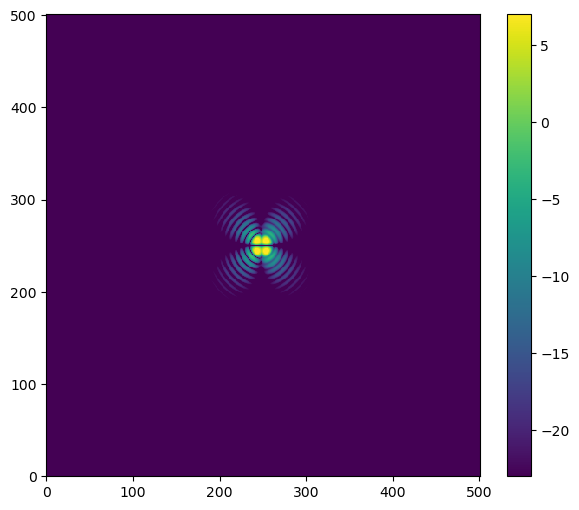

In [48]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(E_cx.reshape(501,-1)))*20,vmax = vmax-40, vmin = vmax-70)
plt.colorbar()


In [80]:
import h5py as h5
def readh5(fname):
    name = fname.split('.')
    with h5.File(name[0]+'.h5','r') as f:
        co = f['co-polar'][:,:]
        cx = f['cx-polar'][:,:]
        Az = f['Az'][:]
        El = f['El'][:]
    return Az, El, co, cx


In [81]:
Az, El, grasp_co,grasp_cx = readh5('output2/150GHz/150GHz_test/_H5/_x50_y0GHz.h5')


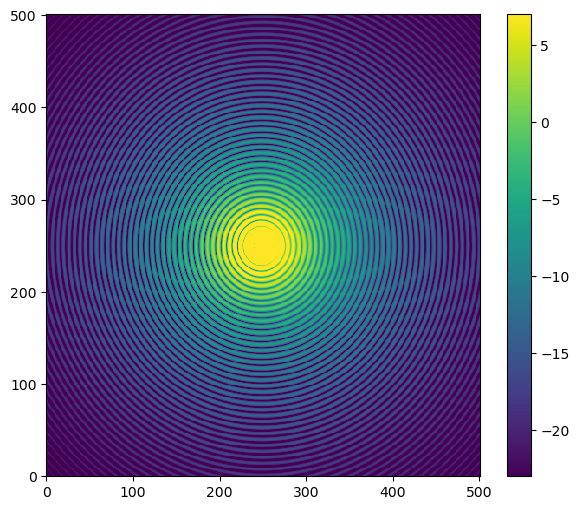

In [82]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(grasp_co.reshape(501,-1)))*20,vmax = vmax-40, vmin = vmax-70)
plt.colorbar()


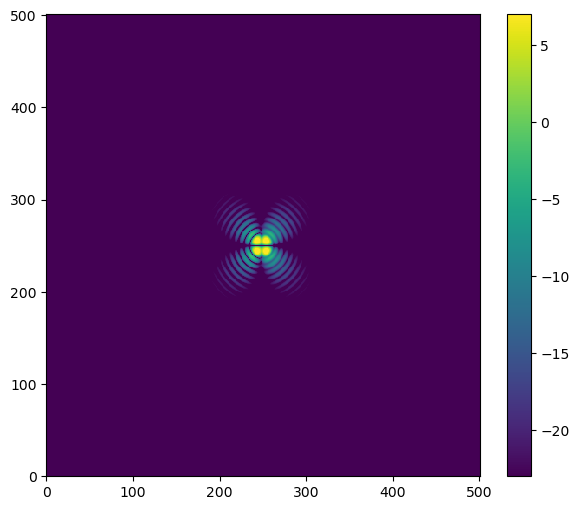

In [ ]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(grasp_cx.reshape(501,-1)))*20,vmax = vmax-40, vmin = vmax-70)Hamaker, J.P. & Bregman, J.D., 1996, A&AS 117, 161
plt.colorbar()


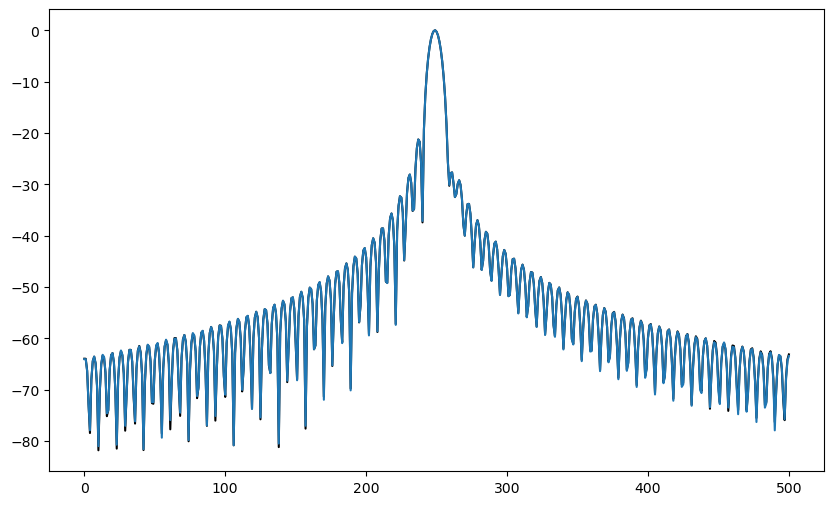

In [84]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:])/np.abs(grasp_co.reshape(501,-1)[250,:]).max())*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])/np.abs(E_co.reshape(501,-1)[250,:]).max())*20,'-')


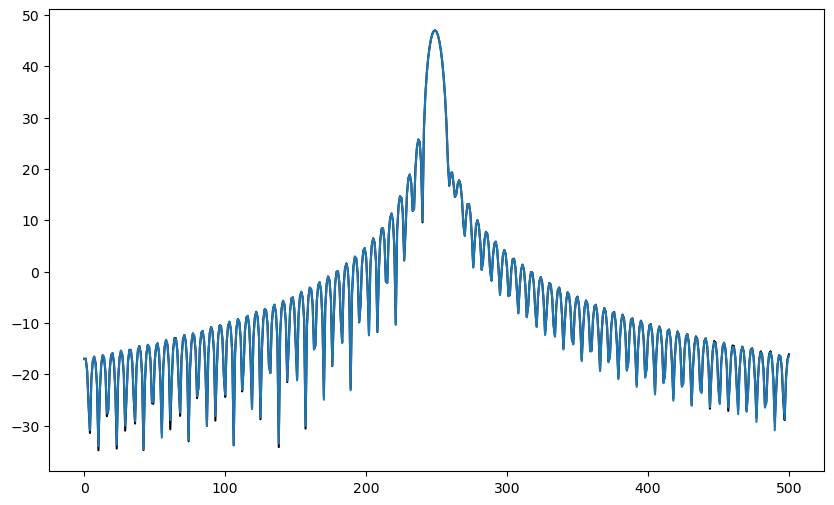

In [85]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])**2)*10,'-')


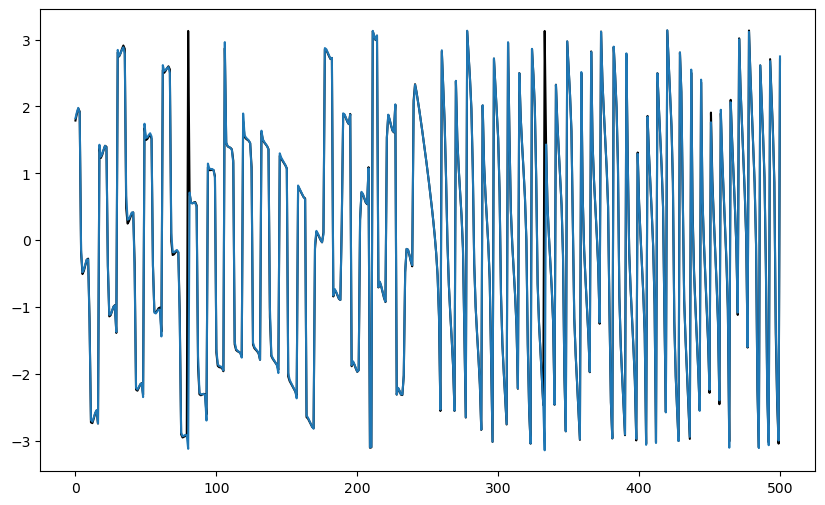

In [86]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.angle(grasp_co.reshape(501,-1)[250,:]/np.abs(grasp_co.reshape(501,-1)[250,:]).max()),'k-')
plt.plot(np.angle(E_co.reshape(501,-1)[250,:]/np.abs(E_co.reshape(501,-1)[250,:]).max()),'-')


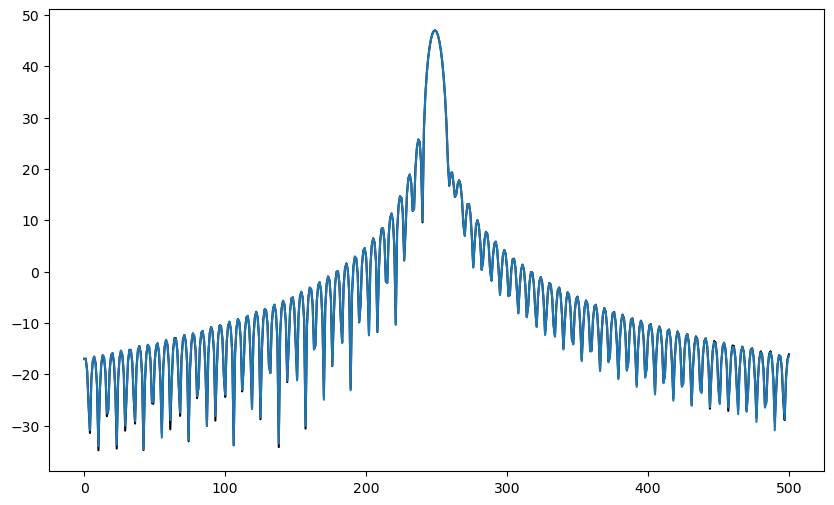

In [88]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])**2)*10,'-')


In [23]:
G_co = grasp_co.reshape(501,-1).T/grasp_co.reshape(501,-1)[250,250]
H_co = E_co.reshape(501,-1).T/E_co.reshape(501,-1)[250,250]
err = H_co-G_co


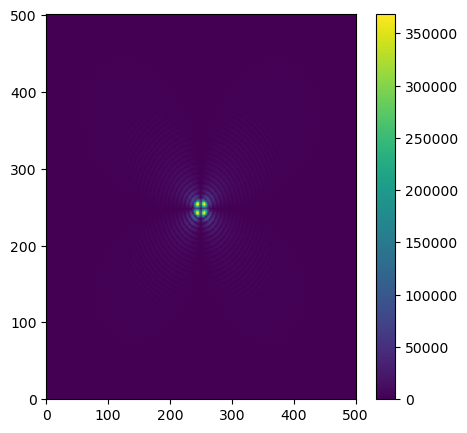

In [24]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err))
plt.colorbar()


In [25]:
G_co = grasp_co.reshape(501,-1)/grasp_co.reshape(501,-1)[250,250]
H_co = E_co.reshape(501,-1)/E_co.reshape(501,-1)[250,250]
err = G_co-G_co.T
err2 = H_co-H_co.T


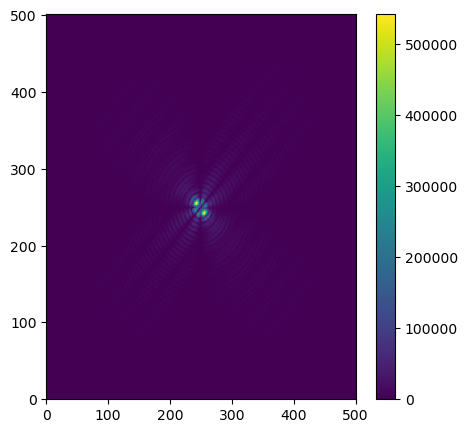

In [26]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err))
plt.colorbar()


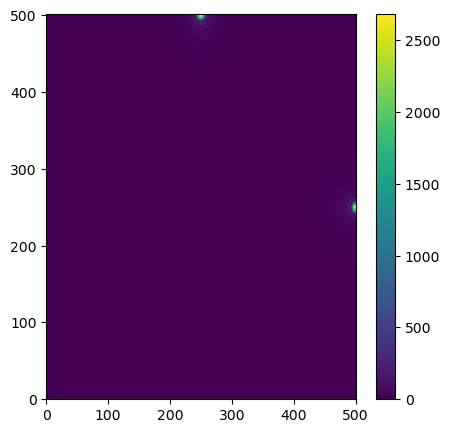

In [27]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err2))
plt.colorbar()


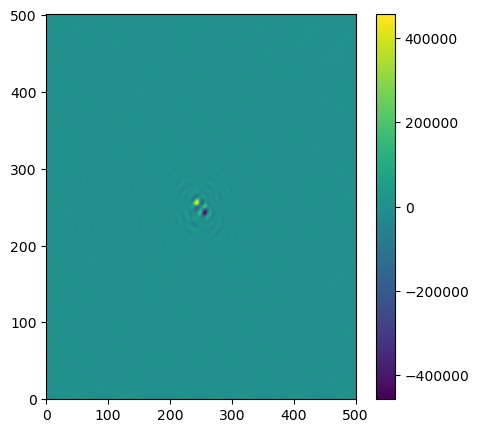

In [28]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(err.imag)
plt.colorbar()


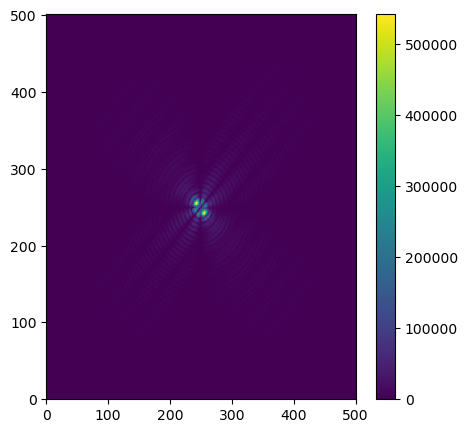

In [96]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err))
plt.colorbar()


(-1.0, 1.0)

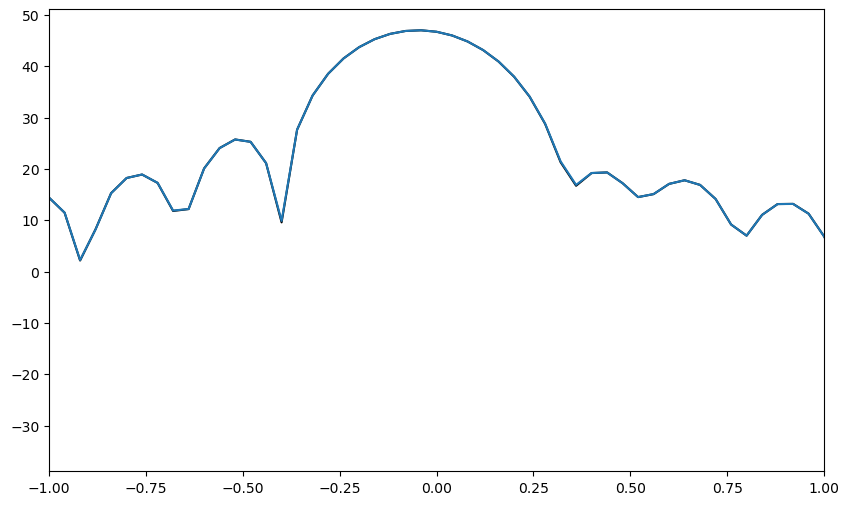

In [ ]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(Az,np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')Hamaker, J.P. & Bregman, J.D., 1996, A&AS 117, 161


(-1.0, 1.0)

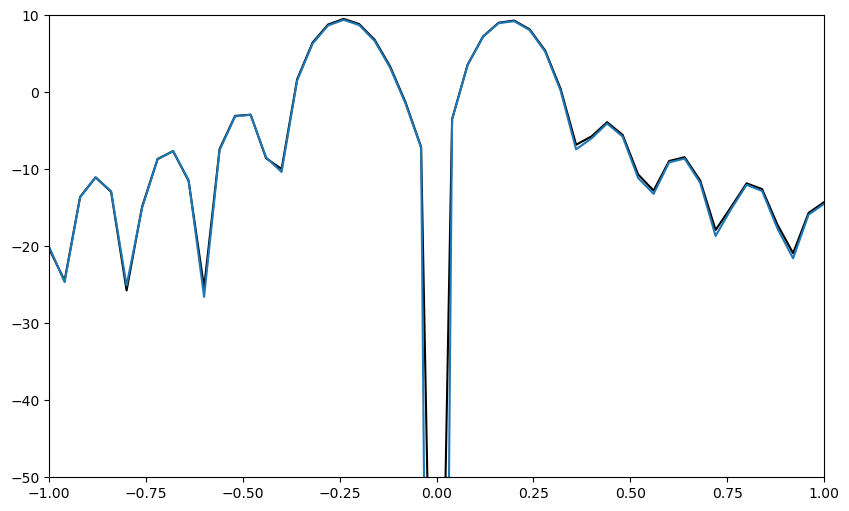

In [ ]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(Az,np.log10(np.abs(np.diagonal(grasp_cx.reshape(501,-1))))*20,'k-')
plt.plot(Az,np.log10(np.abs(np.diagonal(center_grd.E.y.reshape(501,-1))))*20,'-')
plt.ylim([-50,10])
plt.xlim(-1,1)


In [32]:
L_lensFp_3   = 7.177590111674096
L_lens3_2    = 15.586806616226909
L_lens2_1    = 57.632802785493645
L_lens1_Lyot = 1.162050628144469
L_Ly_vw      = 22.7114

L_lens1_ref = L_lensFp_3 + L_lens3_2 + L_lens2_1
L_lens2_ref = L_lensFp_3 + L_lens3_2
L_lens3_ref = L_lensFp_3 
L_Ly_ref = L_lens1_ref + L_lens1_Lyot
L_vw_ref = L_Ly_ref + L_Ly_vw


In [33]:
print(L_lens1_ref*10)
print(L_lens2_ref*10)
print(L_lens3_ref*10)


803.9719951339465
227.64396727901004
71.77590111674095


In [ ]:
Az.size
